In [33]:
import serial,time
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import os
import pandas as pd
import scipy.signal as signal

In [34]:
arduino = serial.Serial('COM5',9600,timeout=0.003)# Se debe indicar el puerto serial y la velocidad de transmision 

time.sleep(4)

numero_datos = 3200 # esto corresponde al numero de datos que se va adquirir, se puede modificar pero 1000 es un buen numero 
EMG = np.ndarray((0),dtype=int) # aquí se almacenará la señal 

# mientras el arreglo no tenga los datos que requiero los solicito
while EMG.shape[0] < numero_datos: 
    
    # esto lee lo que haya en el buffer
    datos = arduino.readlines(arduino.inWaiting())
    
    datos_por_leer = len(datos)
    
  
    # Si hay mas datos de los que quiero leer
    # solo me quedo con la cantidad que me interesa
    if len(datos) > numero_datos:
        datos = datos[0:numero_datos]
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(numero_datos,dtype = int)
    else:
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(datos_por_leer,dtype = int)

    
    posicion = 0
    #se convierten los datos a valores numericos de voltaje. 
    for dato in datos:
        # voy a tratar de convertir los datos
        try:
            # elimino los saltos de linea y caracter de retorno y convierto a entero
            valores_leidos[posicion] = int(dato.decode().strip())
        except:
            # si no puedo convertir completo la muestra con el anterior
             valores_leidos[posicion] = 0  # alternativa
            #valores_leidos[posicion] = valores_leidos[posicion-1]
        posicion = posicion + 1
    # agrego los datos leidos al arreglo
    EMG = np.append(EMG,valores_leidos)
    # Introduzco un delay para que se llene de nuevo el buffer
    time.sleep(2)

# como la ultima lectura puede tener mas datos de los que necesito descarto las muestras restantes
EMG = EMG[0:numero_datos]

# ya con los datos leidos podemos graficar y guardar
ruta_actual = os.path.dirname(os.path.abspath(__file__))
nombre_archivo = "datos_ecg.xlsx"
ruta = os.path.join(ruta_actual, nombre_archivo)
# Crear un nuevo libro de trabajo de Excel
libro_trabajo = openpyxl.Workbook()

# Seleccionar la hoja activa
hoja = libro_trabajo.active

# Escribir la señal en la hoja de Excel
for i, valor in enumerate(EMG, start=1):
    hoja.cell(row=i, column=1).value = valor

# Guardar el archivo Excel
libro_trabajo.save(ruta)

plt.plot(EMG[201:])
plt.show()
arduino.close()  # Cerrar puerto serial, siempre debe cerrarse

NameError: name '__file__' is not defined

In [ ]:
ruta_excel = 'C:\\Users\\Juan Camilo\\Documents\\Juanca\\biosenales\\Proyecto\\Seguimiento_3\\sujeto1.xlsx'
dataframe = pd.read_excel(ruta_excel)
# Convertir los datos del DataFrame a una lista llena de valores
lista_valores = dataframe.values.flatten().tolist()
EMG = lista_valores
print(EMG)

[307, 301, 304, 303, 305, 305, 302, 305, 302, 304, 306, 304, 310, 305, 304, 304, 305, 302, 304, 303, 309, 300, 301, 304, 1, 309, 307, 301, 304, 303, 305, 305, 302, 305, 302, 304, 306, 304, 310, 305, 304, 304, 305, 302, 304, 303, 309, 300, 301, 304, 1, 309, 307, 301, 304, 303, 305, 305, 302, 305, 302, 304, 306, 304, 310, 305, 304, 304, 305, 302, 304, 303, 309, 300, 301, 304, 237, 212, 212, 231, 220, 243, 239, 226, 235, 251, 234, 232, 257, 254, 247, 271, 231, 253, 250, 258, 296, 253, 246, 303, 240, 296, 259, 257, 273, 291, 311, 247, 292, 266, 312, 278, 282, 297, 292, 323, 294, 306, 288, 321, 295, 325, 300, 310, 358, 300, 345, 305, 343, 344, 340, 372, 341, 352, 344, 362, 342, 353, 369, 353, 370, 354, 356, 349, 378, 380, 373, 371, 412, 358, 422, 362, 416, 370, 386, 395, 388, 383, 409, 419, 385, 420, 402, 419, 423, 381, 415, 400, 428, 416, 415, 401, 463, 394, 420, 413, 411, 406, 421, 400, 412, 408, 397, 406, 407, 390, 399, 392, 411, 391, 401, 394, 385, 406, 383, 385, 386, 399, 387, 382, 378

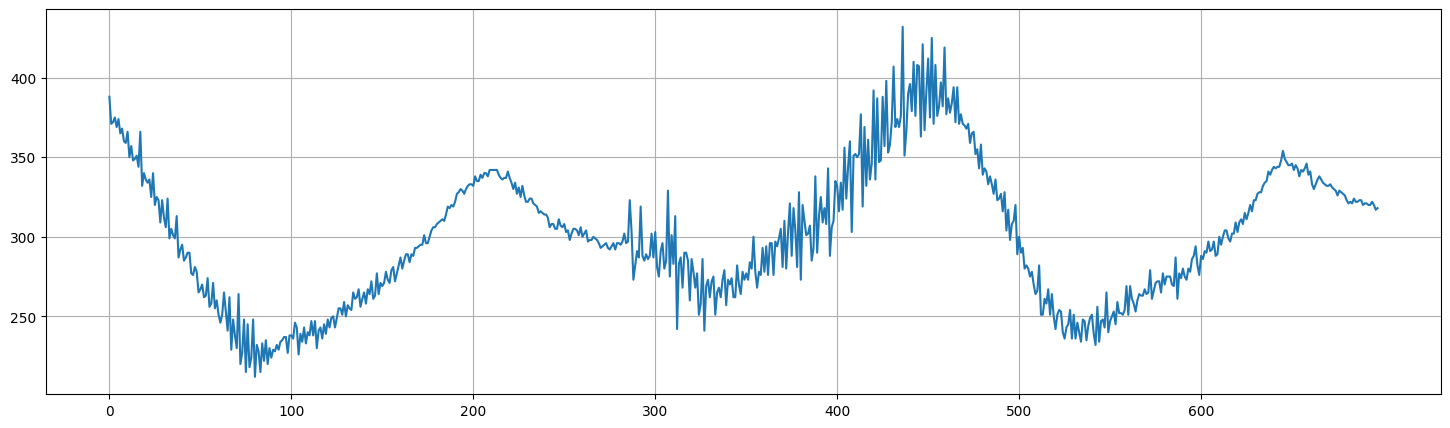

In [ ]:
EMG_US = EMG[201:]
plt.figure(figsize=(18,5))
plt.plot(EMG_US)
plt.xticks(np.arange(0,len(EMG_US),100))
plt.grid(True)
plt.show()

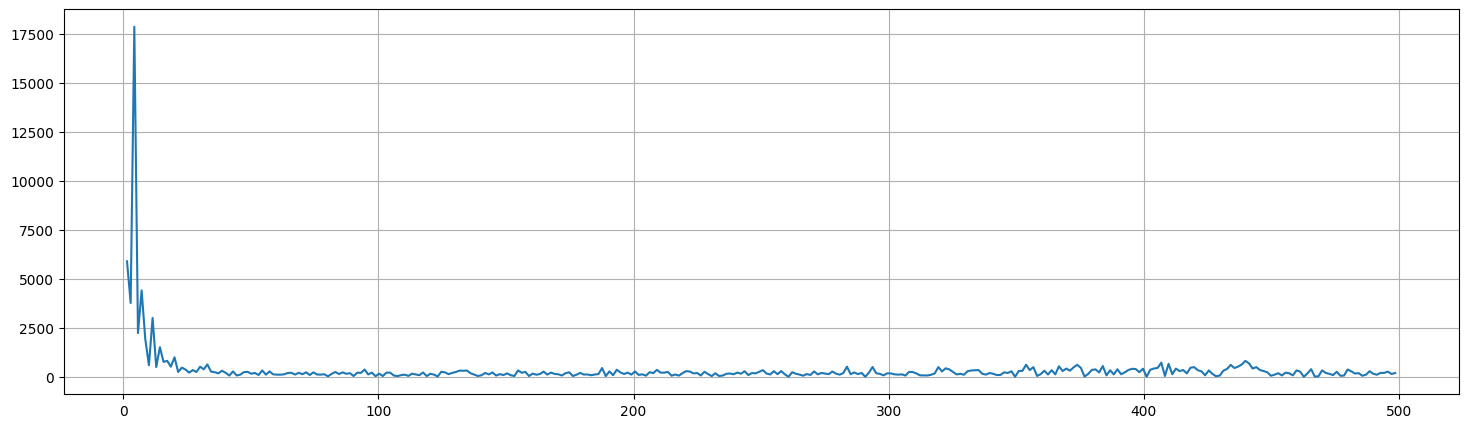

In [ ]:
FFT_O = np.fft.fft(EMG_US)
# Cálculo del espectro de frecuencia
N = len(FFT_O)
f_o = np.fft.fftfreq(N,1/1000)[:N//2]
m_o = np.abs(FFT_O)[:N//2]
plt.figure(figsize=(18,5))
plt.grid(True)
plt.plot(f_o[1:],m_o[1:])
plt.show()

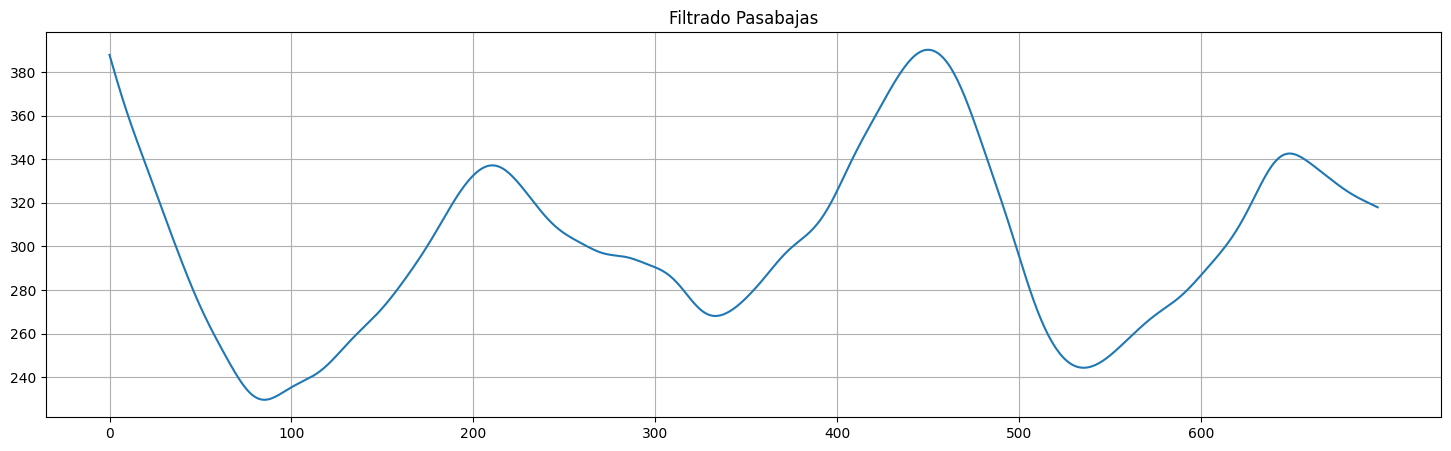

In [ ]:
Fs = 1/0.001 # frecuencia de nyquist
nyquist = Fs/2
wn = 10/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass_senal = signal.firwin(28+1,wn,pass_zero = 'lowpass',window='hamming')
salida = signal.filtfilt(b=lowpass_senal,a=1,x=EMG_US)
t=np.arange(0,len(salida),1)
plt.figure(figsize=(18,5))
plt.title("Filtrado Pasabajas")
plt.plot(t,salida)
plt.grid(True)
plt.xticks(np.arange(0,len(salida),100))
plt.show()

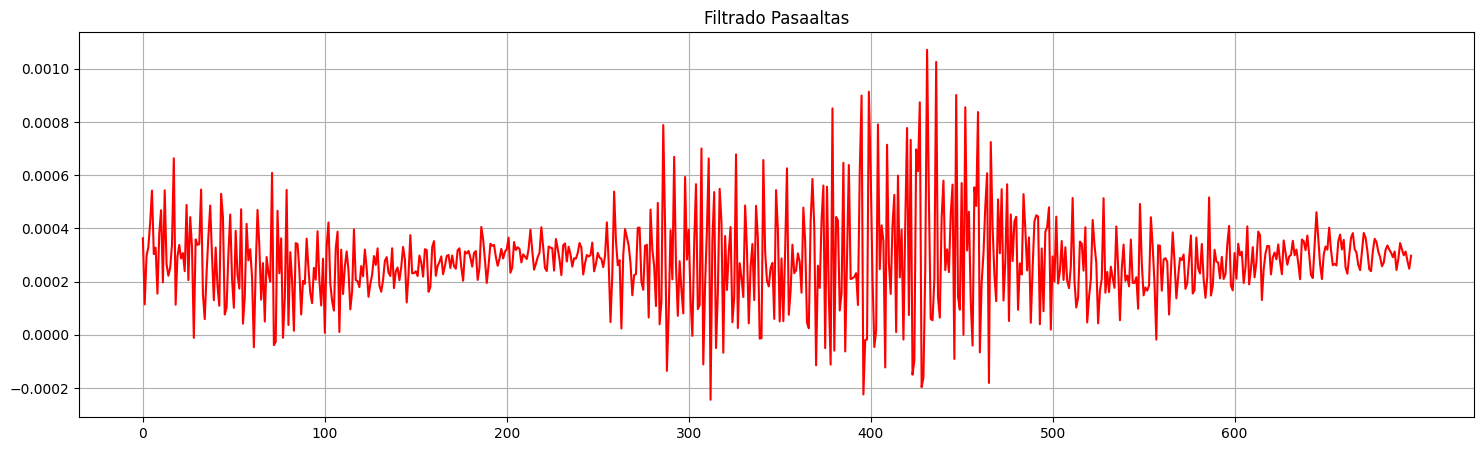

In [ ]:
Fs = 1/0.001 # frecuencia de nyquist
nyquist = Fs/2
wn2 = 120/nyquist #frecuencia de corte normalizada respecto nyquist
high_senal = signal.firwin(28+1,wn2,pass_zero = 'highpass',window='hamming')
salida2 = signal.filtfilt(b=high_senal,a=1,x=salida)
t2=np.arange(0,len(salida2),1)
plt.figure(figsize=(18,5))
plt.title("Filtrado Pasaaltas")
plt.plot(t2,(salida2),color='red')
plt.grid(True)
plt.xticks(np.arange(0,len(salida2),100))
plt.show()

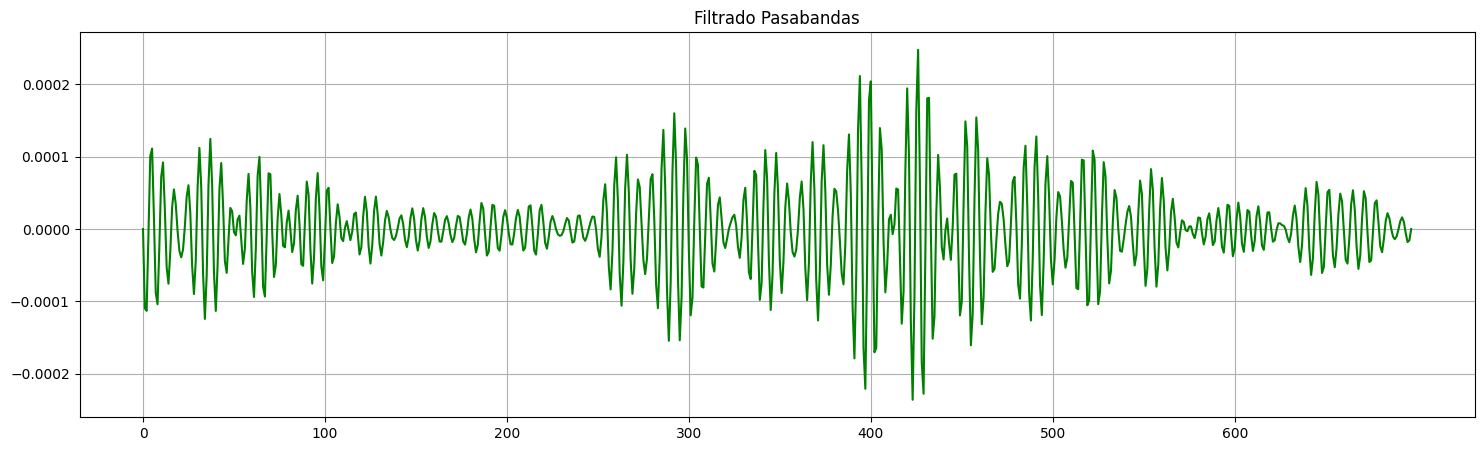

In [ ]:
Fs = 1/0.001 # frecuencia de nyquist
nyquist = Fs/2
wnb = [50/nyquist,60/nyquist] #frecuencia de corte normalizada respecto nyquist
high_senal = signal.firwin(28+1,wnb,pass_zero = 'bandpass',window='hamming')
salida3 = signal.filtfilt(b=high_senal,a=1,x=salida2)
t3=np.arange(0,len(salida3),1)
plt.figure(figsize=(18,5))
plt.plot(t3,(salida3),color='green')
plt.title("Filtrado Pasabandas")
plt.grid(True)
plt.xticks(np.arange(0,len(salida3),100))
plt.show()

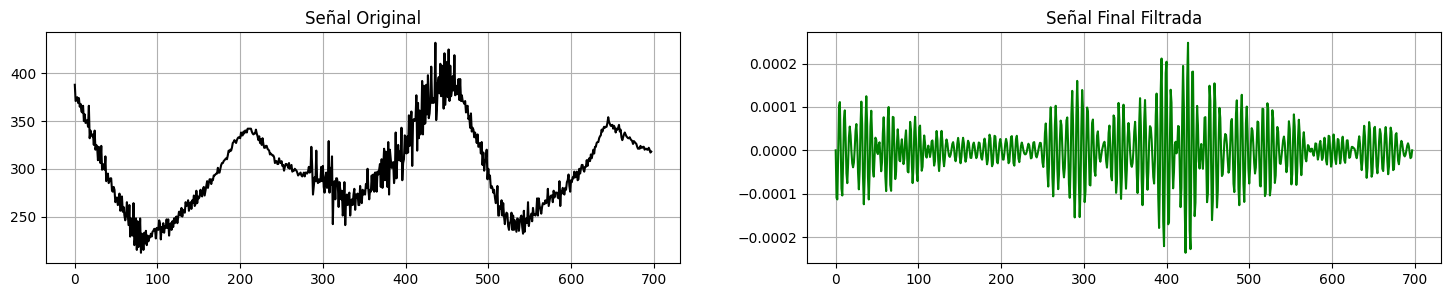

In [ ]:
# Definir el tamaño de la figura
plt.figure(figsize=(18,3))

# Crear el primer subplot
plt.subplot(1, 2, 1)
plt.plot(EMG_US, color='black')  # Graficar el primer conjunto de datos
plt.grid(True)
plt.title('Señal Original')  # Agregar título si deseas

# Crear el segundo subplot
plt.subplot(1, 2, 2)
plt.plot(t3, salida3, color='green')  # Graficar el segundo conjunto de datos
plt.grid(True)
plt.title('Señal Final Filtrada')  # Agregar título si deseas

plt.show()

In [ ]:
def pasa_bajas(Fs,Wn,Order,Senal):
    nyquist = Fs/2
    Wn = Wn/nyquist #frecuencia de corte normalizada respecto nyquist
    lowpass_senal = signal.firwin(Order+1,Wn,pass_zero = 'lowpass',window='hamming')
    salida = signal.filtfilt(b=lowpass_senal,a=1,x=Senal)
    t=np.arange(0,len(salida),1)
    plt.figure(figsize=(18,5))
    plt.plot(t,salida)
    plt.grid(True)
    plt.xticks(np.arange(0,len(Senal),100))
    plt.show()
    return salida
def pasa_altas(Fs,Wn,Order,Senal):
    nyquist = Fs/2
    Wn = Wn/nyquist #frecuencia de corte normalizada respecto nyquist
    highpass_senal = signal.firwin(Order+1,Wn,pass_zero = 'highpass',window='hamming')
    salida = signal.filtfilt(b=highpass_senal,a=1,x=Senal)
    t=np.arange(0,len(salida),1)
    plt.figure(figsize=(18,5))
    plt.plot(t,salida)
    plt.grid(True)
    plt.xticks(np.arange(0,len(Senal),100))
    plt.show()
    return salida
def pasa_bandas(Fs,Wnb,Order,Senal):
    nyquist = Fs/2
    Wnb1 = Wnb[0]/nyquist
    Wnb2 = Wnb[1]/nyquist
    highpass_senal = signal.firwin(Order+1,[Wnb1,Wnb2],pass_zero = 'bandpass',window='hamming')
    salida = signal.filtfilt(b=highpass_senal,a=1,x=Senal)
    t=np.arange(0,len(salida),1)
    plt.figure(figsize=(18,5))
    plt.plot(t,salida)
    plt.grid(True)
    plt.xticks(np.arange(0,len(Senal),100))
    plt.show()
    return salida

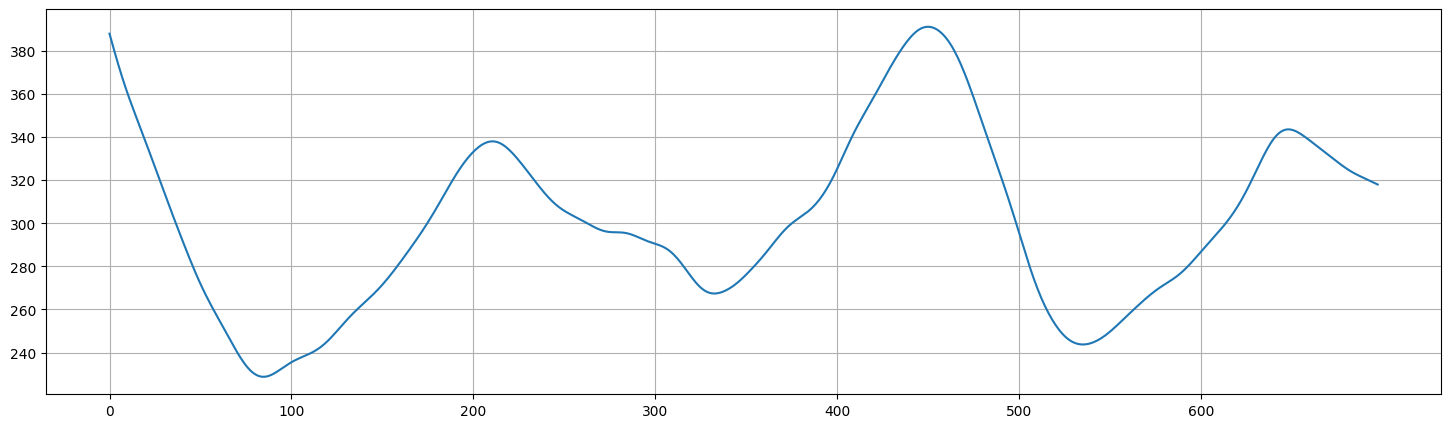

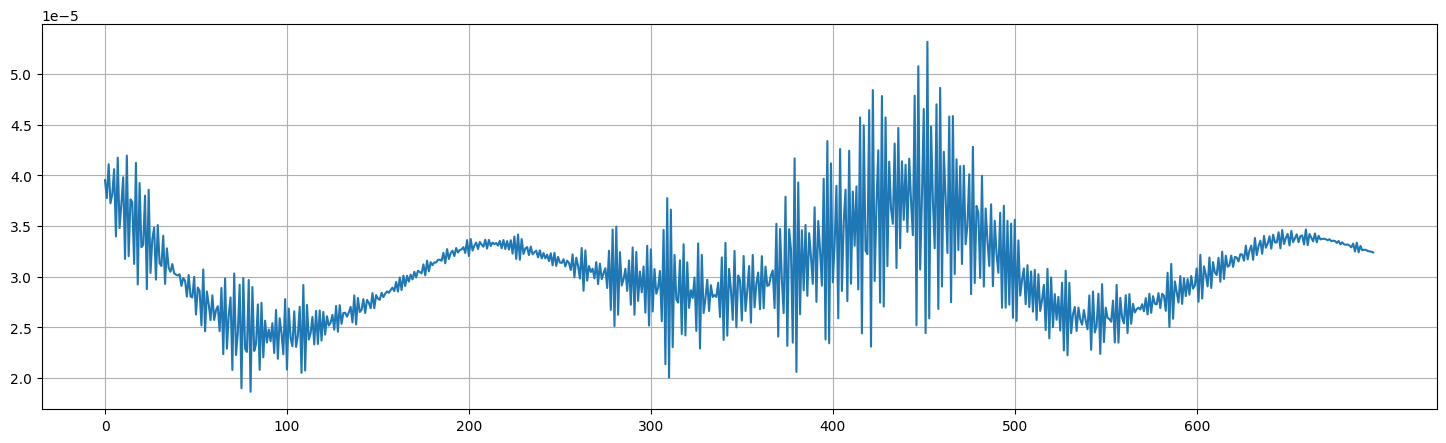

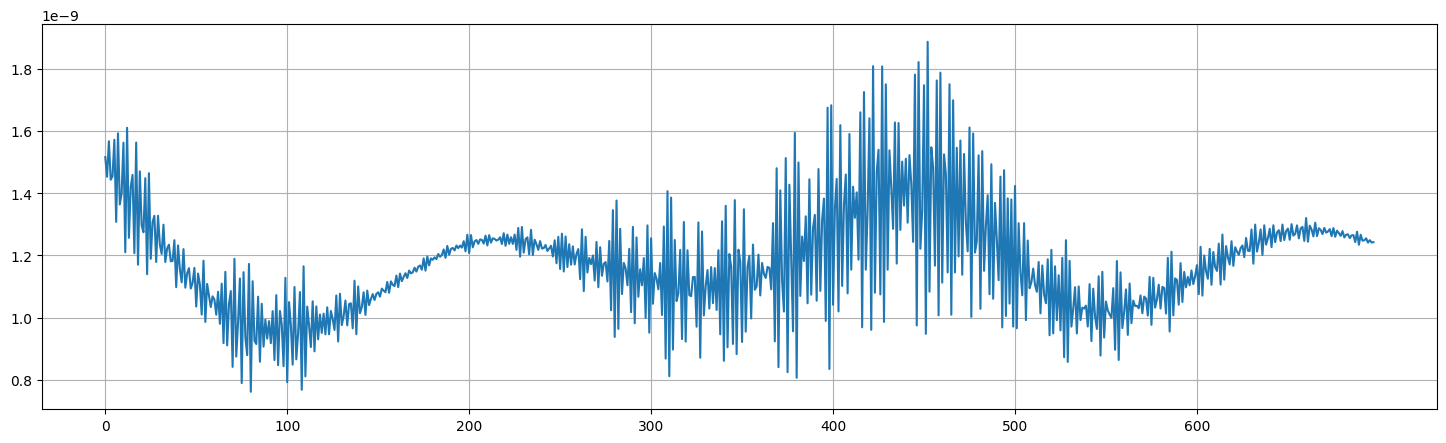

In [ ]:
salida_prueba_1 = pasa_bajas(1/0.003,10,28,EMG_US)
salida_prueba_2 = pasa_altas(1/0.003,120,28,salida_prueba_1)
salida_prueba_3 = pasa_bandas(1/0.003,[50,60],28,salida_prueba_2)

In [ ]:
tiempo_prueba = np.arange(len(EMG_US)) / 333
maximo = np.max(EMG_US)
tolerancia = 0.2 * maximo
categoria = ['Flexión' if maximo - tolerancia <= valor <= maximo + tolerancia else 'Extensión' for valor in EMG_US]
data = {'Tiempo': tiempo_prueba, 'Amplitud': EMG_US, 'Clase': categoria}
database = pd.DataFrame(data)
display(database)

,Tiempo,Amplitud,Clase
0,0.000000,388,Flexión
1,0.003003,371,Flexión
2,0.006006,372,Flexión
3,0.009009,375,Flexión
4,0.012012,369,Flexión
...,...,...,...
693,2.081081,320,Extensión
694,2.084084,322,Extensión
695,2.087087,320,Extensión
696,2.090090,317,Extensión


In [ ]:
def discriminacion(senal,val_tol):
    tiempo_prueba = np.arange(len(senal)) / 333
    maximo = np.max(senal)
    tolerancia = (val_tol/100) * maximo
    categoria = ['Flexión' if maximo - tolerancia <= valor <= maximo + tolerancia else 'Extensión' for valor in senal]
    data = {'Tiempo': tiempo_prueba, 'Amplitud': senal, 'Clase': categoria}
    database = pd.DataFrame(data)
    # Recorrer el DataFrame
    for index,row in database.iterrows():
        if row['Clase'] == 'Flexión':
            print("Enciende  Led 🎇")
        else:
            print("Apaga Led 🎆")
    return database

In [ ]:
original = discriminacion(salida_prueba_3,15)


Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Enciende  Led 🎇
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
Apaga Led 🎆
